No of rows =  7824482
No of columns =  3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  object 
 1   prod_id  object 
 2   rating   float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


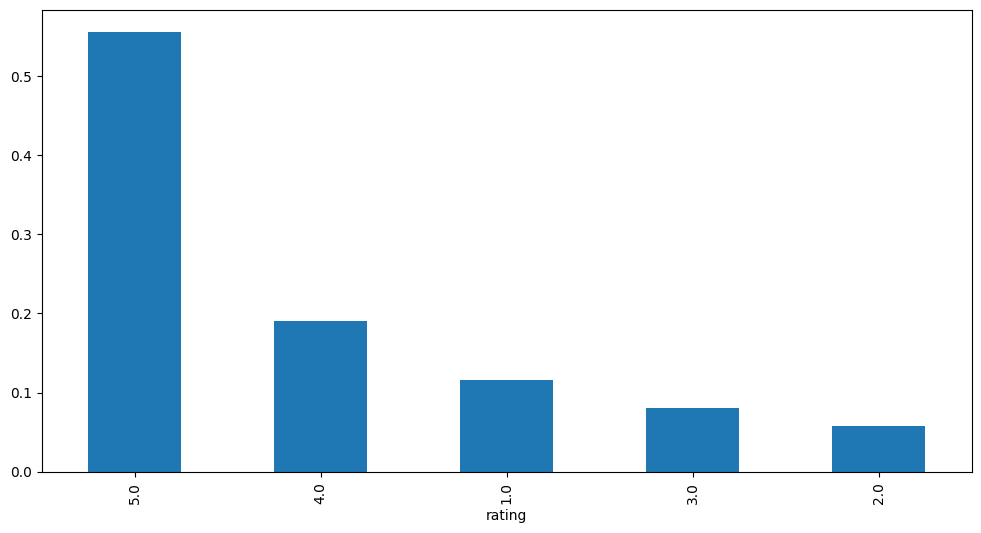

Number of unique USERS in Raw data =  4201696
Number of unique ITEMS in Raw data =  476002
user_id
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
dtype: int64
The number of observations in the final data = 125871
Number of unique USERS in the final data = 1540
Number of unique PRODUCTS in the final data = 48190
Shape of final_ratings_matrix: (1540, 48190)
Density: 0.17%
            avg_rating  rating_count
prod_id                             
0594451647         5.0             1
B003RRY9RS         5.0             1
B003RR95Q8         5.0             1
B003RIPMZU         5.0             1
B003RFRNYQ         5.0             2
['B001TH7GUU', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW']
['B003ES5ZUU', 'B000N99BBC', 'B007WTAJTO', 'B002V88HFE', 'B004CLYEDC']
[320, 12, 793, 261, 156, 1493, 1250, 567, 753, 1360]


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

In [1]:
from flask import Flask, jsonify, request
from recommendation_logic import recommendations, final_ratings_matrix  # Import the functions from recommendation_logic

app = Flask(__name__)

@app.route('/recommendations/<user_id>', methods=['GET'])
def get_recommendations(user_id):
    try:
        user_id = int(user_id)  # Ensure the user_id is an integer
        top_recommendations = recommendations(user_id, 5, final_ratings_matrix)  # Get top 5 recommendations
        return jsonify({"recommendations": top_recommendations})
    except ValueError:
        return jsonify({"error": "Invalid user_id"}), 400
    except Exception as e:
        return jsonify({"error": str(e)}), 500

if __name__ == "__main__":
    app.run(debug=True)